In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Load DataFrame
df = pd.read_csv('./assets/imigrantes_canada-2.csv')
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df_melted = df.melt(id_vars=['Continente', 'País', 'Região', 'Total'], var_name='Ano', value_name='Imigrantes')
df_brasil = df_melted[df_melted['País'] == 'Brasil']
df_argerlia = df_melted[df_melted['País'] == 'Argélia']
df_zambia = df_melted[df_melted['País'] == 'Zâmbia']
df_granada = df_melted[df_melted['País'] == 'Granada']
df_brasil.head()

,Continente,País,Região,Total,Ano,Imigrantes
24,América Latina e o Caribe,Brasil,América do Sul,29659,1980,211
219,América Latina e o Caribe,Brasil,América do Sul,29659,1981,220
414,América Latina e o Caribe,Brasil,América do Sul,29659,1982,192
609,América Latina e o Caribe,Brasil,América do Sul,29659,1983,139
804,América Latina e o Caribe,Brasil,América do Sul,29659,1984,145


Faça manipulações simples, considerando:
- Alterar o tamanho da fonte;
- Adicionando GRID e Marcadores;
- Mude apenas a cor da linha
- Mude as cores com os dados de imigração dos países da América do Sul para o Canadá (vertical e horizontal)

Text(0.5, 1.0, 'Imigrantes para o canada saindo Brasil')

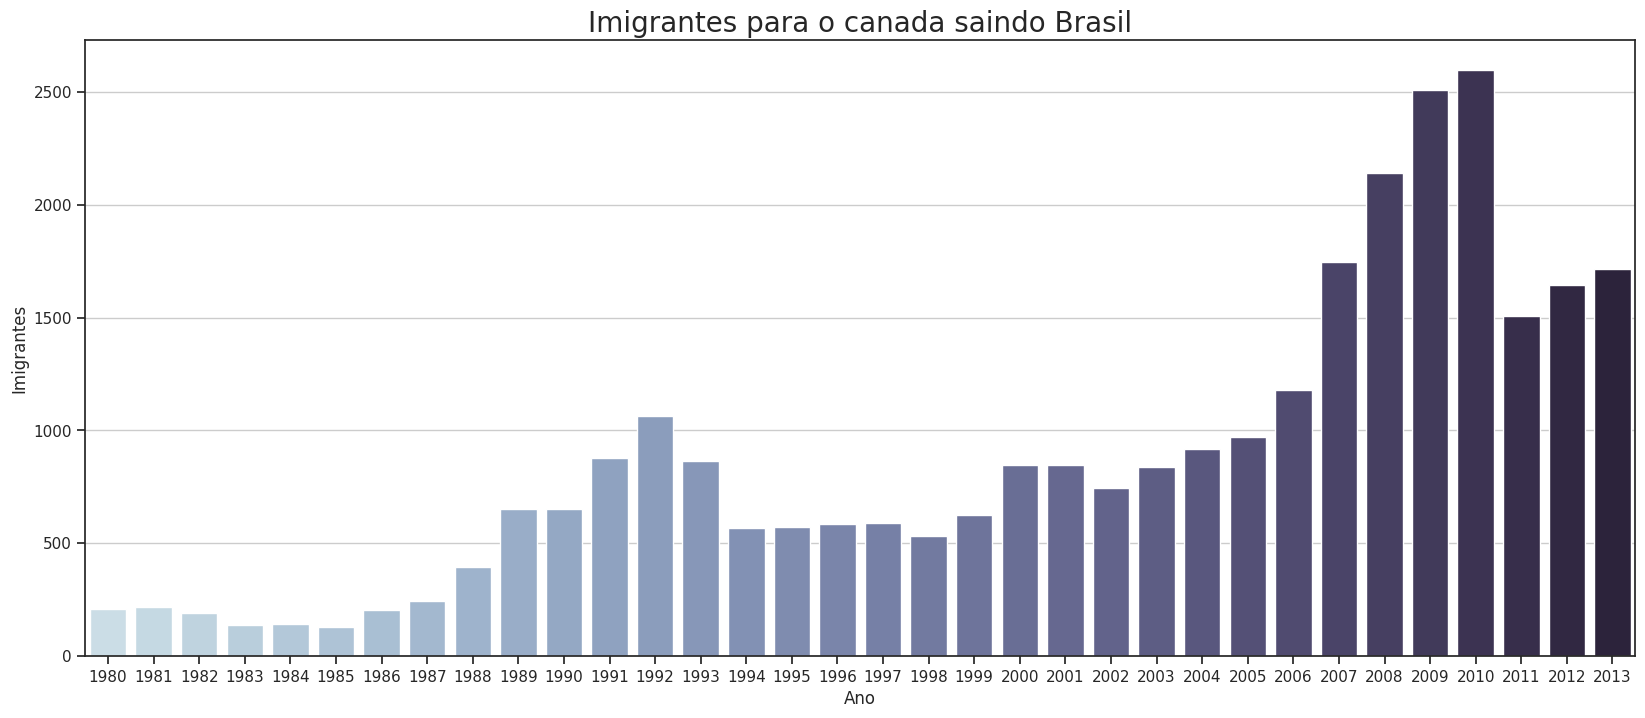

In [48]:
sns.set_style("darkgrid")
sns.set_style("ticks",{'axes.grid' : True}) # Adiciona o GRID podemos usar o plt.grid()
fig, axes = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(20)

f = sns.barplot(
    x='Ano',
    y='Imigrantes',
    data=df_brasil,
    label='teste',
    palette="ch:s=.25,rot=-.25", # Muda as cores do gráfico
)
f.set_title('Imigrantes para o canada saindo Brasil', fontsize=20)





1. Adicione títulos ao gráfico gerado com base na planilha CSV disponibilizada


In [52]:
df_examples = pd.concat([df_brasil, df_argerlia, df_granada, df_zambia])

,Continente,País,Região,Total,Ano,Imigrantes
24,América Latina e o Caribe,Brasil,América do Sul,29659,1980,211
219,América Latina e o Caribe,Brasil,América do Sul,29659,1981,220
414,América Latina e o Caribe,Brasil,América do Sul,29659,1982,192
609,América Latina e o Caribe,Brasil,América do Sul,29659,1983,139
804,América Latina e o Caribe,Brasil,América do Sul,29659,1984,145


- mudar a espessura da linha;

[Text(0.5, 1.0, 'Imigrantes para o Canadá')]

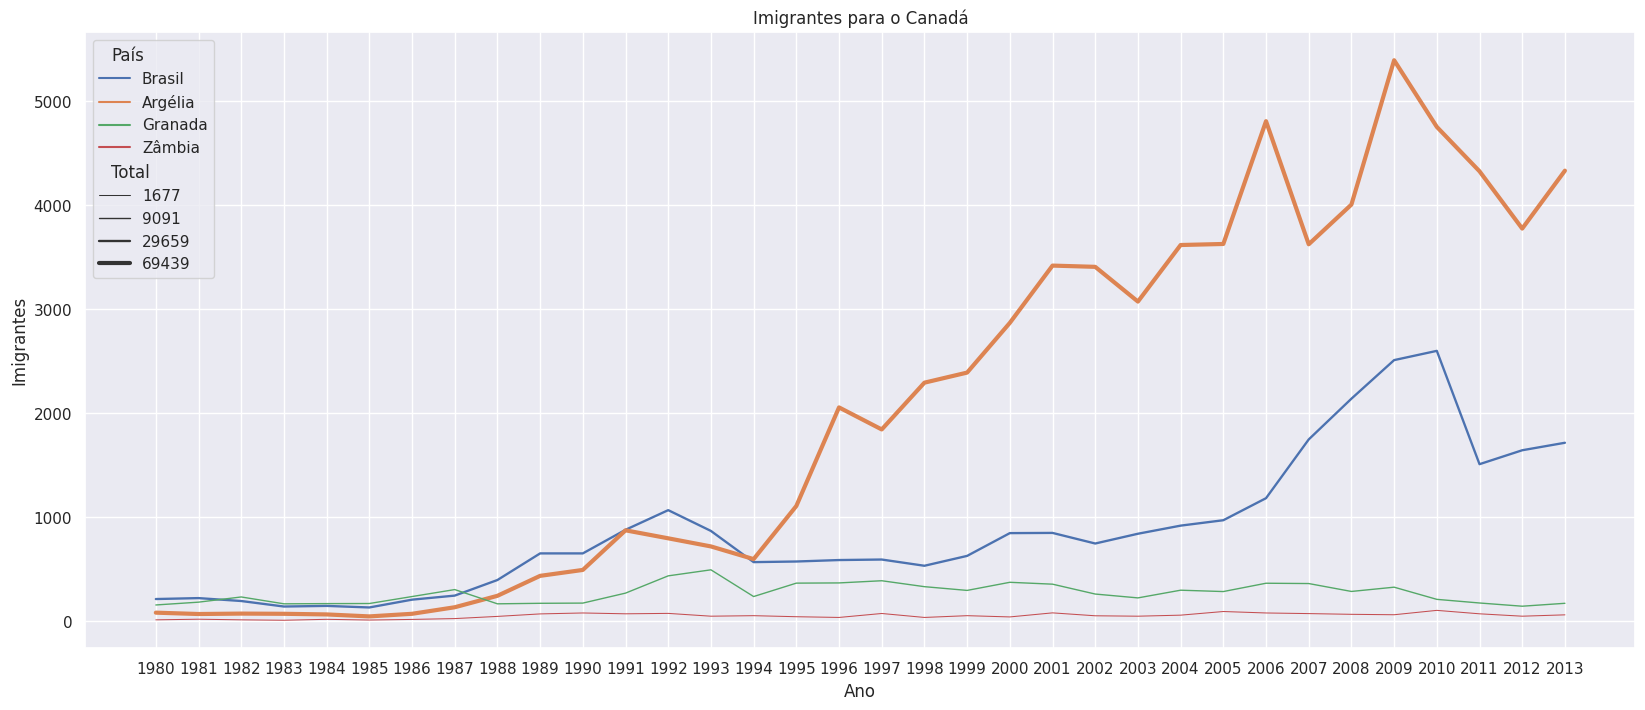

In [54]:
fig, axes = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.set_theme(style="darkgrid")
sns.lineplot(
    x='Ano',
    y='Imigrantes',
    data=df_examples,
    hue='País',
    size='Total' # Muda a expessura do gráfico
).set(
    title='Imigrantes para o Canadá'
)


2. Adicione rótulos aos eixos X e Y com o uso do Seaborn


Text(0, 0.5, 'Imigrantes')

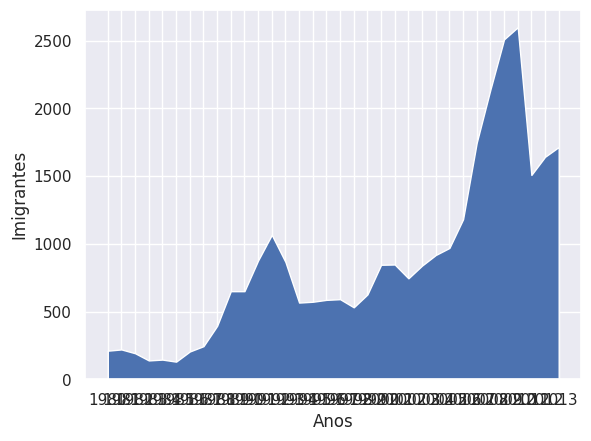

In [7]:
plt.stackplot(df_brasil['Ano'],
              df_brasil['Imigrantes'])
plt.xlabel('Anos')
plt.ylabel('Imigrantes')

In [82]:
df_brasil_sorted = df_brasil.sort_values('Imigrantes', ascending=False)
df_brasil_sorted.loc[df_brasil_sorted['Ano'] == '2005']

,Continente,País,Região,Total,Ano,Imigrantes
4899,América Latina e o Caribe,Brasil,América do Sul,29659,2005,969


- Retire o frame do gráfico, isto é, o RETÂNGULO que cobre o gráfico como um todo.

- Destaque algum país desejado por você e adicione os valores numéricos EM CADA BARRA HORIZONTAL DE CADA PAÍS.


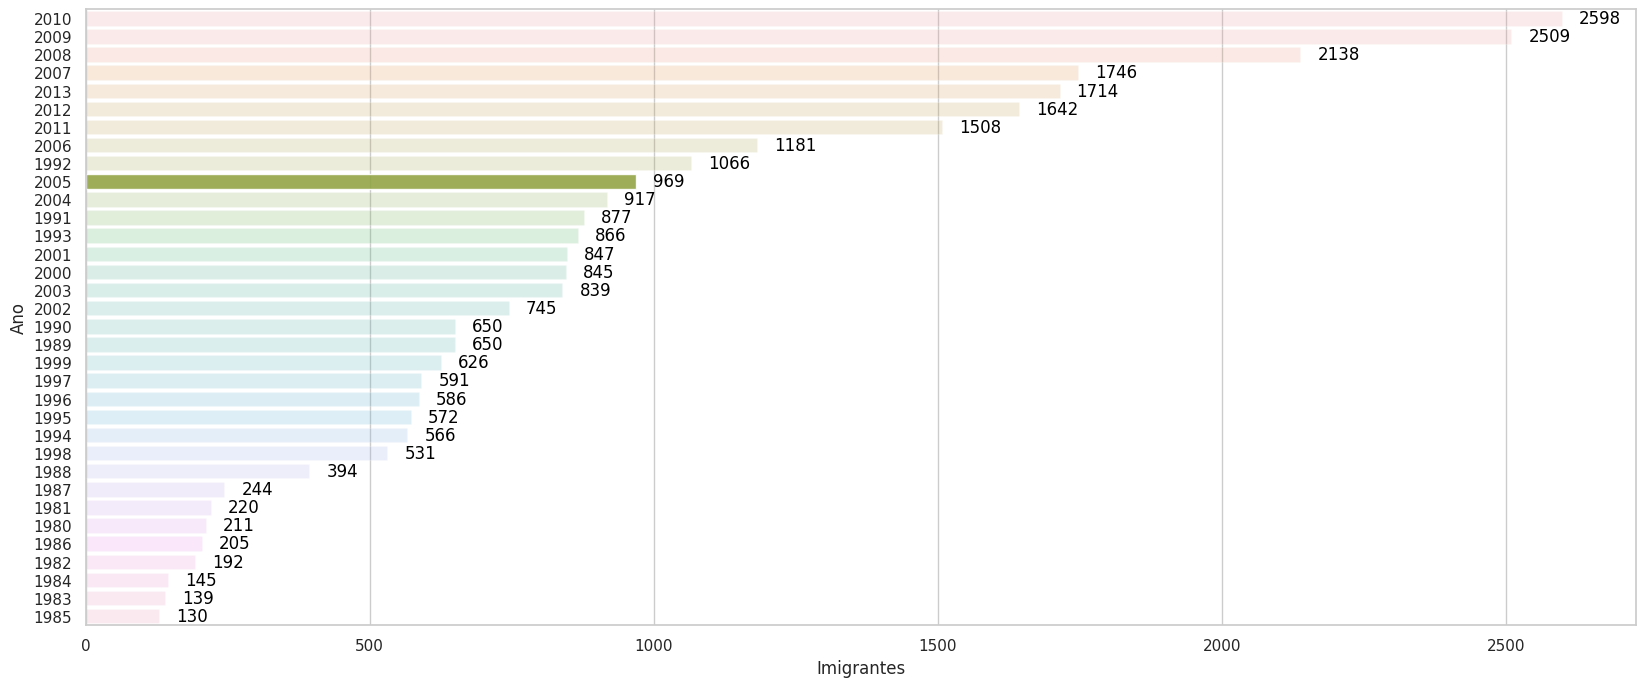

In [133]:
sns.set(style="whitegrid") # Muda o fundo
#fig = plt.subplots(figsize=(20, 5))

fig, axes = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(20)

axes = sns.barplot(
    x='Imigrantes',
    y='Ano',
    data=df_brasil_sorted,
    orient='h',
    alpha=0.2
)

# Highlighting the bar for the year 2005
highlight_index = df_brasil_sorted['Ano'] == '2005'


for i, bar in enumerate(axes.patches):
    if highlight_index.iloc[i]:
        bar.set_alpha(0.9) # Destaca o ano de 2005

for i, v in enumerate(df_brasil_sorted['Imigrantes']):
    axes.text(int(v) + 30, i, str(v), color='black', va='center')

plt.show()



Organize as informações e com o gráfico de barras na horizontal, deixe os dados do MAIOR para o MENOR.


<Axes: xlabel='Ano', ylabel='Imigrantes'>

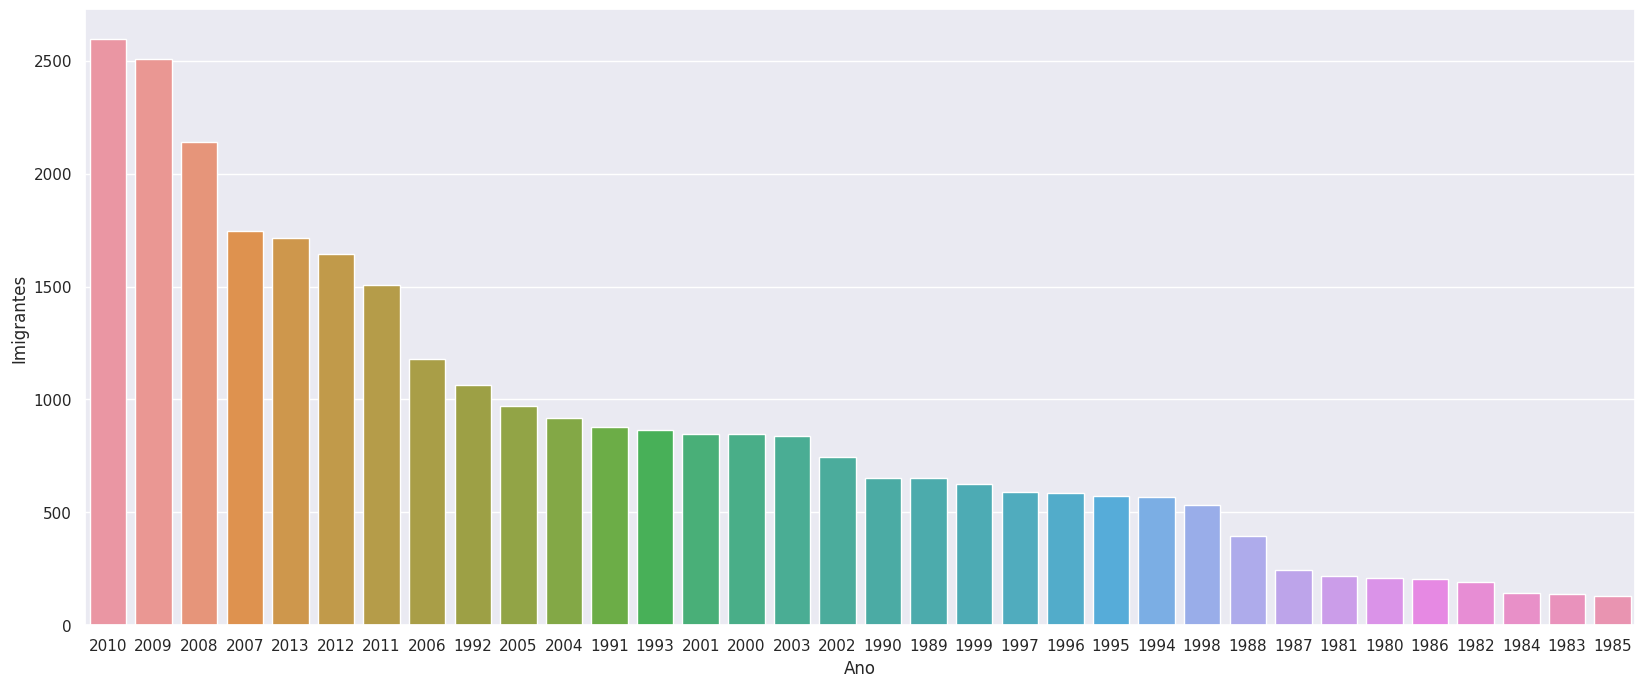

In [36]:
fig, axes = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(20)
sns.set_theme(style="darkgrid")
sns.barplot(
    x='Ano',
    y='Imigrantes',
    data=df_brasil_sorted,
)